# Results Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import visualization as vs
%load_ext autoreload
%autoreload 2

## Remarks

* Raw data pre-processing, remove all the users' records if total records are less than 200

* When we consider ego-alter pair, remove all the alters if they have less than 200 checkins before ego.

* All Cross Entropies who perform worse than a random algorithm ($log_2(N_{Ego-Unique}$) are considered “useless” and all others considered “helpful”. Thic can be verified by maximizing Fano’s inequality for $\Pi_{max}$.

# The whole result dataset (No control, No fixed number of meetupers)

In [3]:
user_stats = pd.read_csv('results/user-meetup-all-None.csv')

## Entropies and Predictabilies

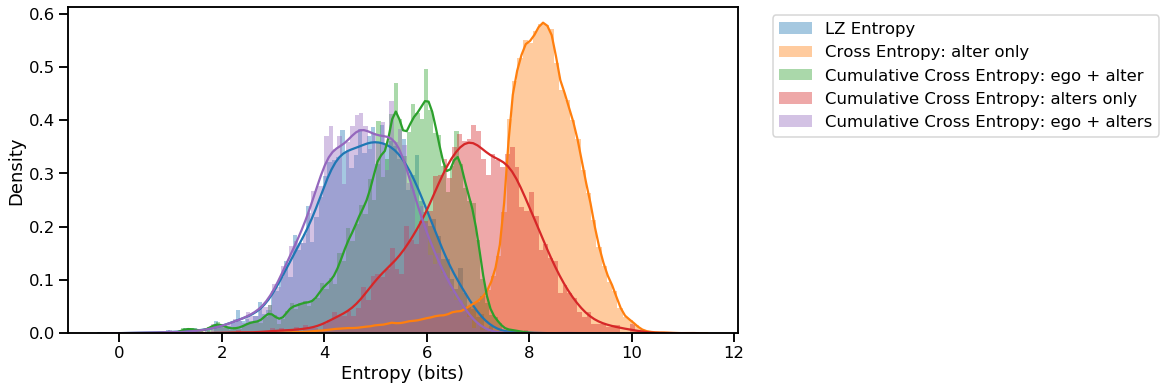

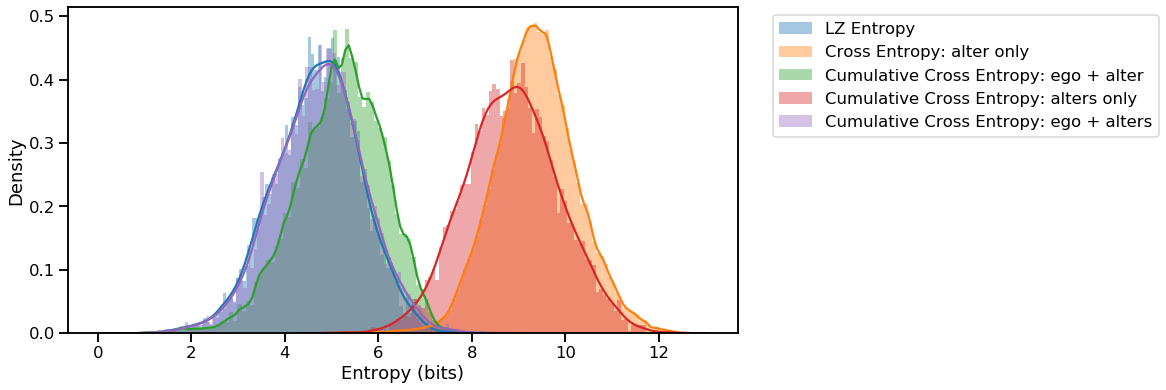

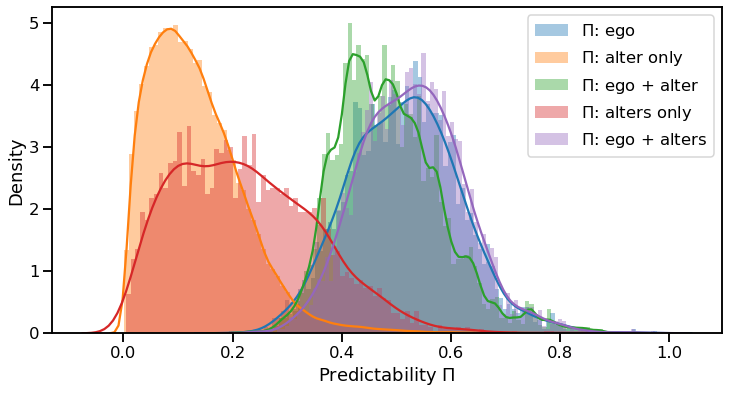

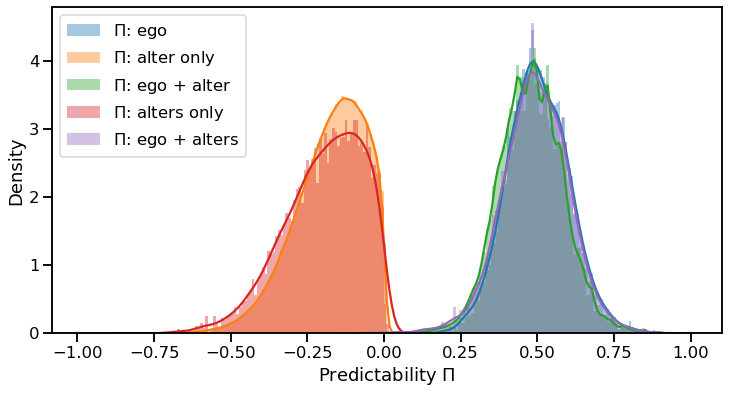

In [5]:
vs.hist_entropy(user_stats[user_stats['group']=='helpful'])
plt.show()
vs.hist_entropy(user_stats[user_stats['group']=='useless'])
plt.show()

vs.hist_pred(user_stats[user_stats['group']=='helpful'])
plt.show()
vs.hist_pred(user_stats[user_stats['group']=='useless'])
plt.show()

## Predictability

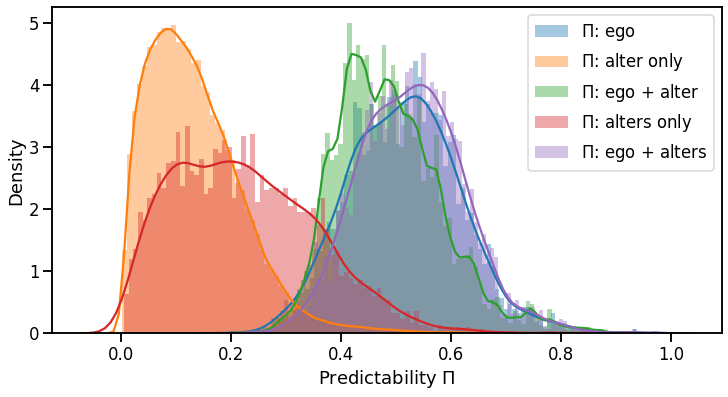

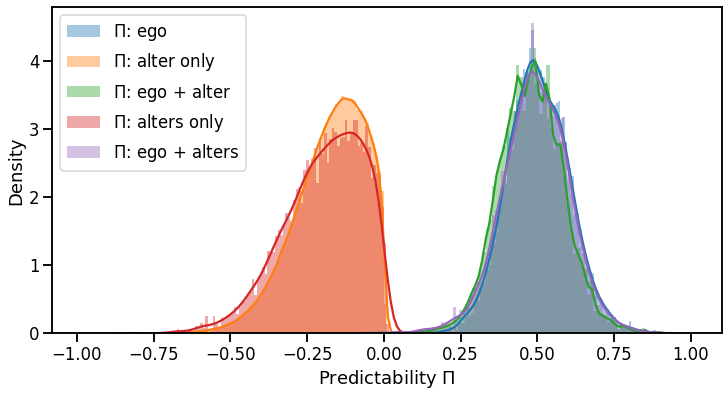

## Paper Plot-- entropy vs predictability

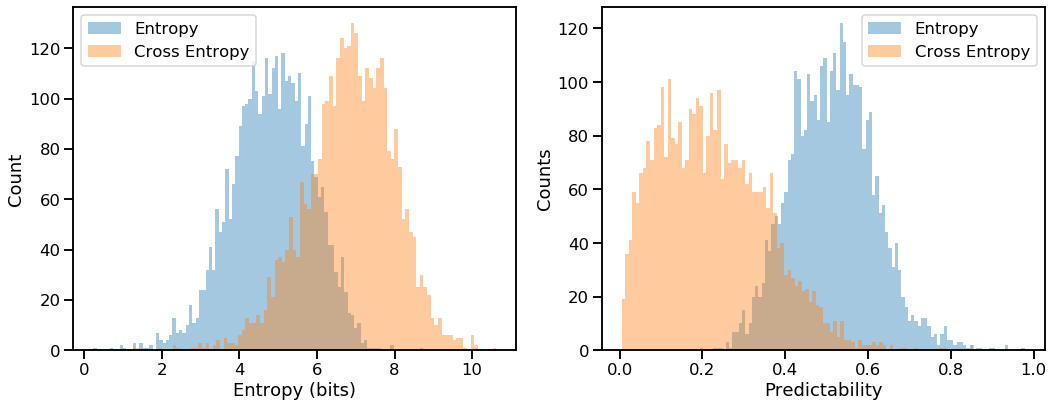

In [8]:
vs.paper_hist(user_stats[user_stats['group']=='helpful'])

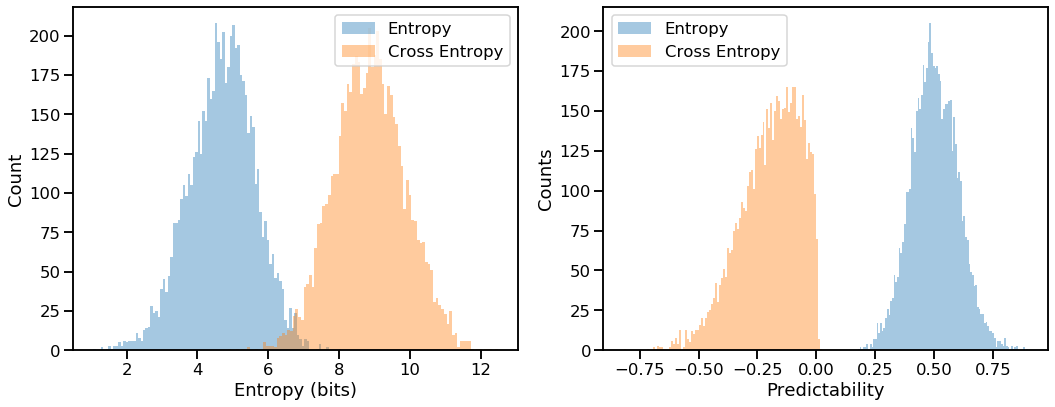

In [7]:
vs.paper_hist(user_stats[user_stats['group']=='useless'])

## Interaction vs Predictability from the view of ego and alter aspect

### ego interaction

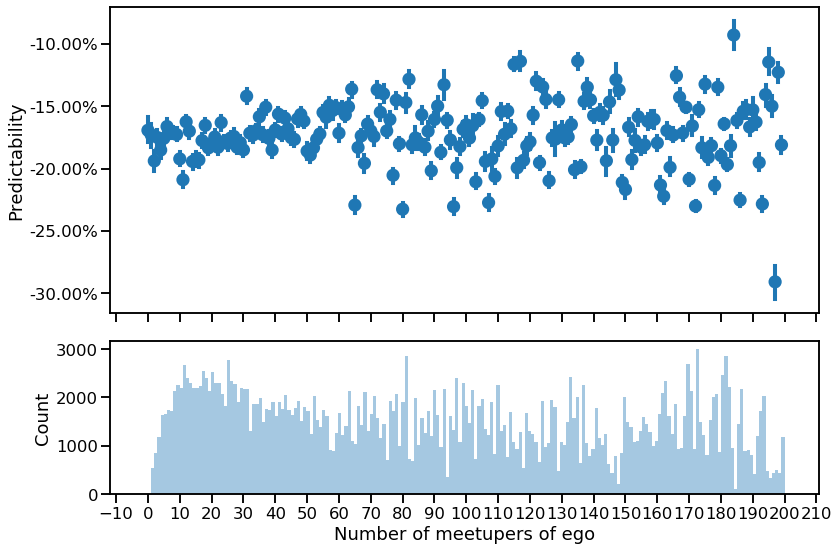

In [9]:
vs.paper_interaction(user_stats[user_stats['group']=='useless'], threshold=200, aspect='ego')

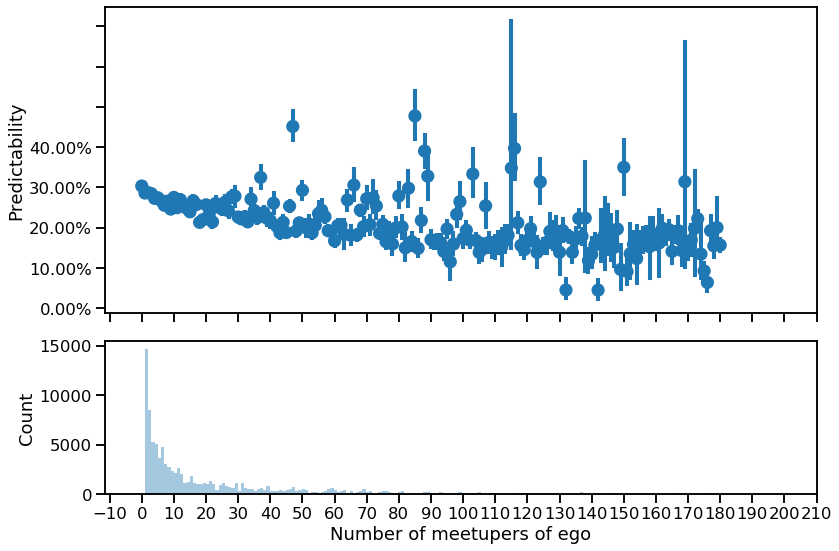

In [11]:
vs.paper_interaction(user_stats[user_stats['group']=='helpful'], threshold=200, aspect='ego')

From the view of ego, we can draw any volid conclusion.

### alter interaction

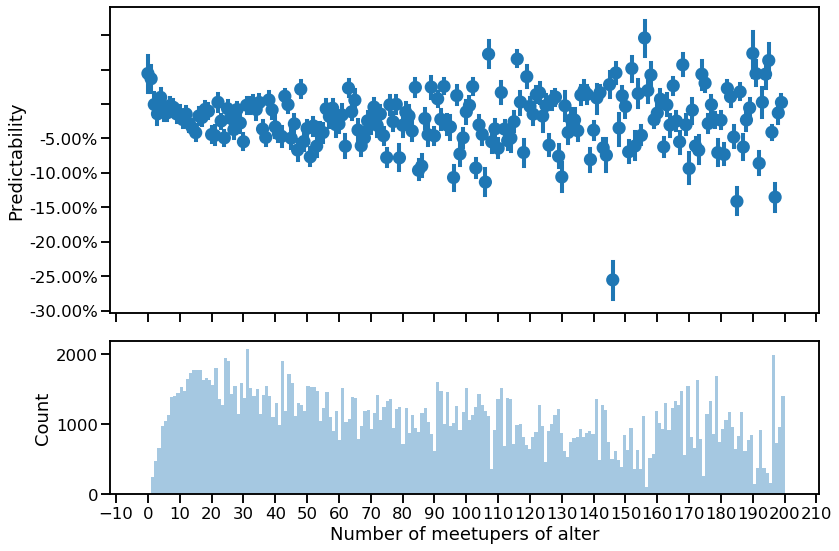

In [12]:
vs.paper_interaction(user_stats[user_stats['group']=='useless'], threshold=200, aspect='alter')

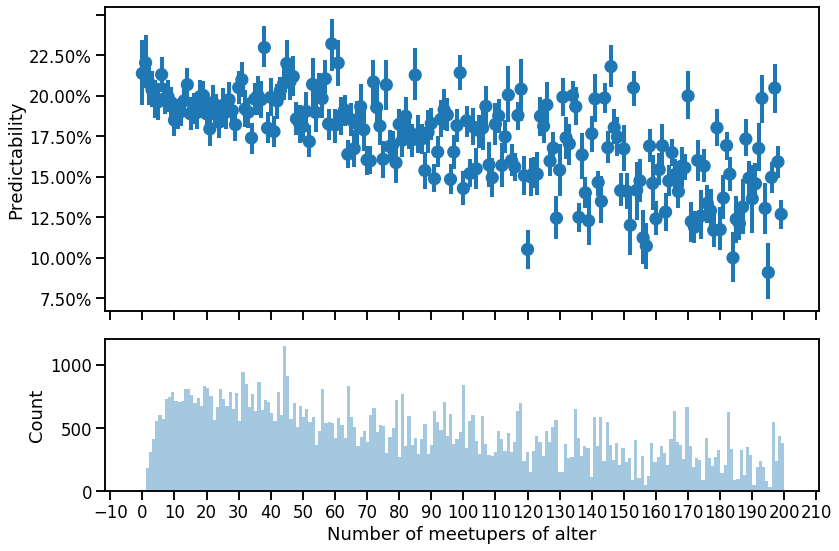

In [12]:
vs.paper_interaction(user_stats[user_stats['group']=='helpful'], threshold=200, aspect='alter')

*From the view of alter, given "helpful" group, we can see a general decreasing trend along with the increase of the number of meetupers of alter.*

## Number of alters added vs entropy and predictability

### entropy

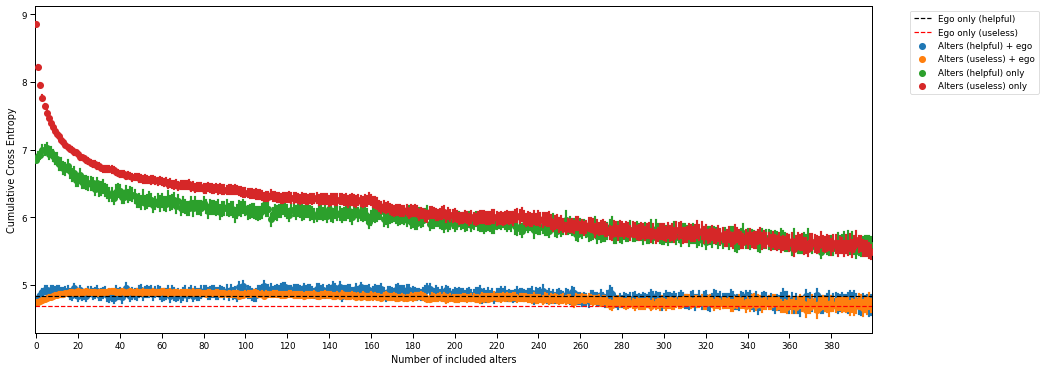

In [24]:
vs.num_point_plot(user_stats, threshold=400, name='entropy', mode='paper', partition=True)

### predictability

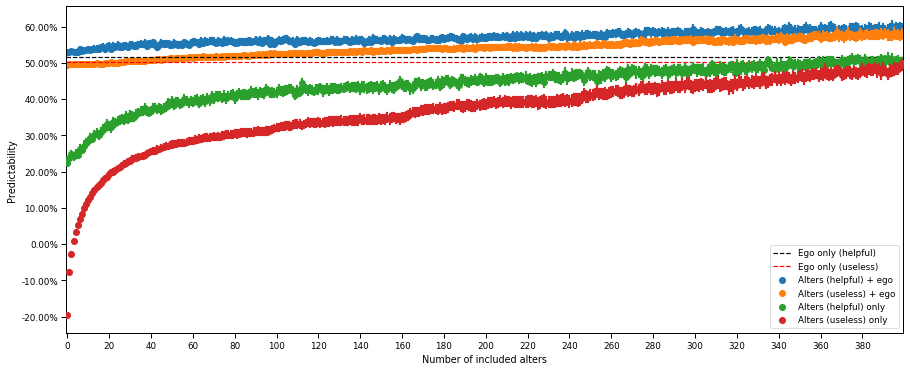

In [14]:
vs.num_point_plot(user_stats, threshold=400, name='predictability', mode='paper', partition=True)

*Generally speaking, the group "helpful" does better than group "useless"!*

# Focus on the partition of 'helpful' and ''useless' group

In [18]:
user_stats_helpful = user_stats[user_stats['group'] == 'helpful']
user_stats_useless = user_stats[user_stats['group'] == 'useless']

## Number of ego's meetupers

In [21]:
user_stats_helpful.groupby('userid_x').size().describe()

count    6267.000000
mean       21.196266
std        51.561940
min         1.000000
25%         2.000000
50%         5.000000
75%        16.000000
max       888.000000
dtype: float64

In [22]:
user_stats_useless.groupby('userid_x').size().describe()

count    9821.000000
mean       43.509622
std        64.474434
min         1.000000
25%         6.000000
50%        17.000000
75%        48.000000
max       536.000000
dtype: float64

In [32]:
name_help = user_stats_helpful.apply(lambda row: row.Weight / row.N_previous, axis=1)
name2_help = user_stats_helpful.apply(lambda row: row.CE_alter / row.ego_info, axis=1)
helpful = user_stats_helpful.assign(wb_Nb=name_help.values, CE_D_info = name2_help.values)
helpful['wb_Nb'].describe()

count    132837.000000
mean          0.154250
std           0.259187
min           0.000413
25%           0.034335
50%           0.082298
75%           0.173516
max           7.299020
Name: wb_Nb, dtype: float64

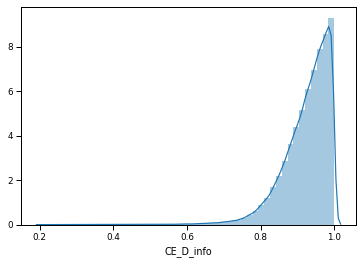

In [34]:
sns.distplot(helpful['CE_D_info'])

In [36]:
name_useless = user_stats_useless.apply(lambda row: row.Weight / row.N_previous, axis=1)
name2_useless = user_stats_useless.apply(lambda row: row.CE_alter / row.ego_info, axis=1)
useless = user_stats_useless.assign(wb_Nb=name_useless.values, CE_D_info = name2_useless.values)
useless['wb_Nb'].describe()

count    427308.000000
mean          0.031523
std           0.045062
min           0.000000
25%           0.006339
50%           0.017827
75%           0.040161
max           2.173913
Name: wb_Nb, dtype: float64

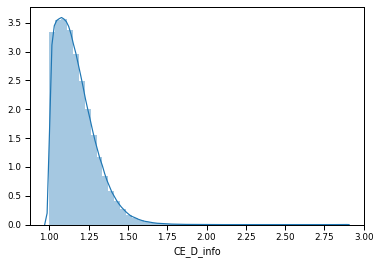

In [37]:
sns.distplot(useless['CE_D_info'])

In [31]:
helpful

,userid_x,userid_y,meetup,percent,N_previous,N_alter,group,Included Rank,Weight,alter_info,...,CCE_ego_alters,Pi_alter,Pi_alters,Pi_ego_alter,Pi_ego_alters,ego_info,LZ_entropy,Pi,n_alter_meetupers,wb_Nb
0,00-a,manabu-tanaka,6,0.052174,468.0,468.0,helpful,1,102,5.857981,...,3.926596,0.064546,0.064546,0.537732,0.537732,6.357552,3.965021,0.531858,94,0.217949
2,00-a,atknktn,4,0.034783,1331.0,1341.0,helpful,3,200,7.357552,...,4.230277,0.151582,0.304501,0.496907,0.490439,6.357552,3.965021,0.531858,100,0.150263
4,00-a,826,3,0.026087,788.0,1193.0,helpful,5,139,7.118941,...,4.137568,0.078016,0.377508,0.524906,0.505092,6.357552,3.965021,0.531858,141,0.176396
7,00-a,kaerugeko,3,0.026087,266.0,266.0,helpful,8,211,6.882643,...,4.039309,0.423780,0.436403,0.566707,0.520413,6.357552,3.965021,0.531858,52,0.793233
8,00-a,maako-tazawa,3,0.026087,375.0,377.0,helpful,9,183,6.149747,...,3.957541,0.330086,0.463534,0.553423,0.533004,6.357552,3.965021,0.531858,64,0.488000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560126,zulfan-tm,gilang-zavatra,62,0.111712,215.0,215.0,helpful,3,430,6.285402,...,3.688054,0.453924,0.519508,0.616279,0.638242,7.592457,4.113363,0.586663,7,2.000000
560127,zulfan-tm,dita-sabila,59,0.106306,759.0,759.0,helpful,4,354,7.499846,...,3.666772,0.162485,0.530098,0.598568,0.640772,7.592457,4.113363,0.586663,8,0.466403
560128,zulfan-tm,fathiya-adisza,37,0.066667,294.0,294.0,helpful,5,308,6.599913,...,3.623675,0.345039,0.541305,0.606316,0.645881,7.592457,4.113363,0.586663,7,1.047619
560129,zulfan-tm,luna-fedrafaisya,15,0.027027,627.0,627.0,helpful,6,482,7.247928,...,3.593675,0.340857,0.560935,0.610096,0.649425,7.592457,4.113363,0.586663,7,0.768740


# Fixed the number of meetupers, n_meetupers = 100

In [38]:
meetupers = user_stats.groupby('userid_x').size().reset_index(name='n_meetupers')
user_stats = user_stats.merge(meetupers, how='left', on='userid_x')

In [39]:
user_stats_part = user_stats[user_stats['n_meetupers'] == 100]

In [40]:
len(set(user_stats_part['userid_x'].tolist()))

20

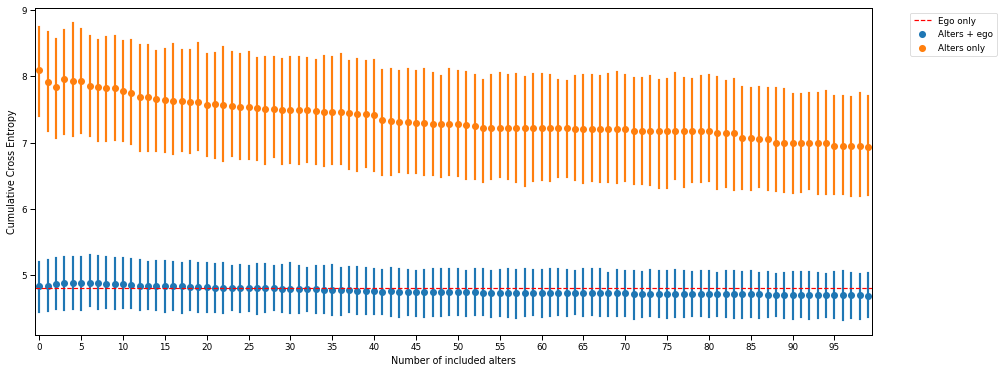

In [41]:
vs.num_point_plot(user_stats_part, name='entropy', mode='paper', partition=False)

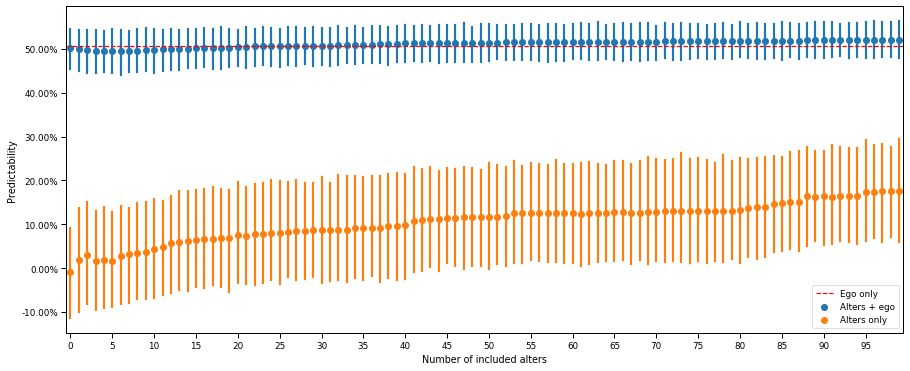

In [42]:
vs.num_point_plot(user_stats_part, name='predictability', mode='paper', partition=False)

# Focus on the ego who has n_meetupers > 100

In [54]:
user_stats_L100 = user_stats[user_stats['n_meetupers'] > 100]

In [55]:
len(set(user_stats_L100['userid_x'].tolist()))

1634

## n_meetupers > 100

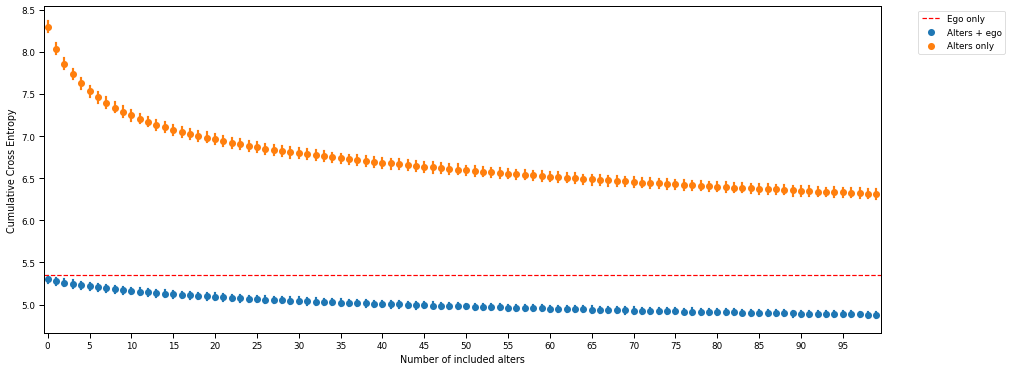

In [58]:
vs.num_point_plot(user_stats_L100, name='entropy', mode='paper', partition=False, threshold=100)

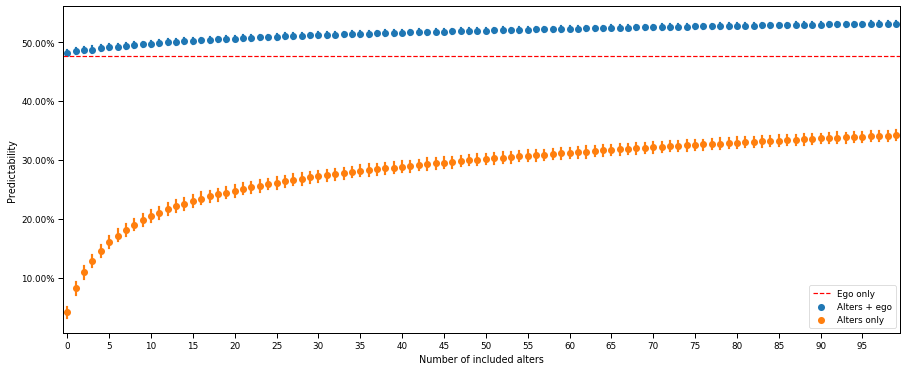

In [59]:
vs.num_point_plot(user_stats_L100, name='predictability', mode='paper', partition=False, threshold=100)

## n_meetupers >300

In [70]:
user_stats_L300 = user_stats[user_stats['n_meetupers'] > 300]
len(set(user_stats_L300['userid_x'].tolist()))

337

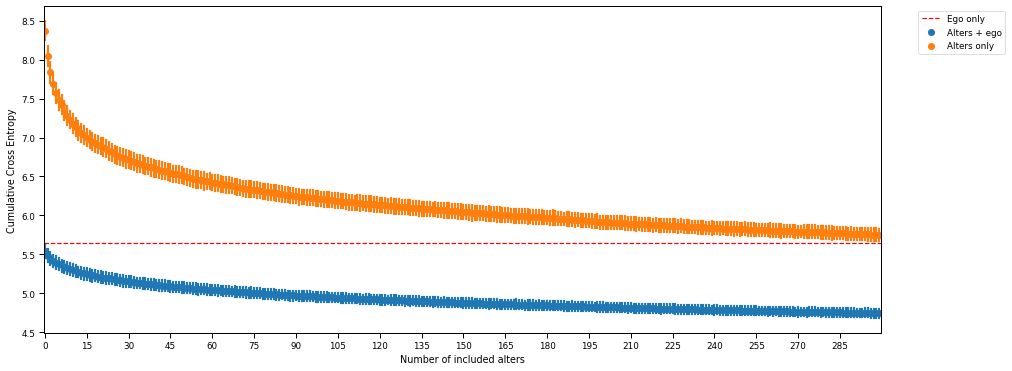

In [71]:
vs.num_point_plot(user_stats_L300, name='entropy', mode='paper', partition=False, threshold=300)

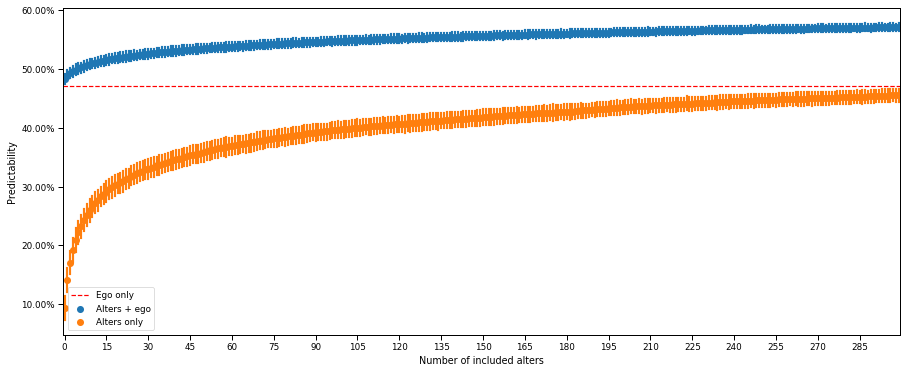

In [72]:
vs.num_point_plot(user_stats_L300, name='predictability', mode='paper', partition=False, threshold=300)

## n_meetupers > 400

In [76]:
user_stats_L400 = user_stats[user_stats['n_meetupers'] > 400]
len(set(user_stats_L400['userid_x'].tolist()))

138

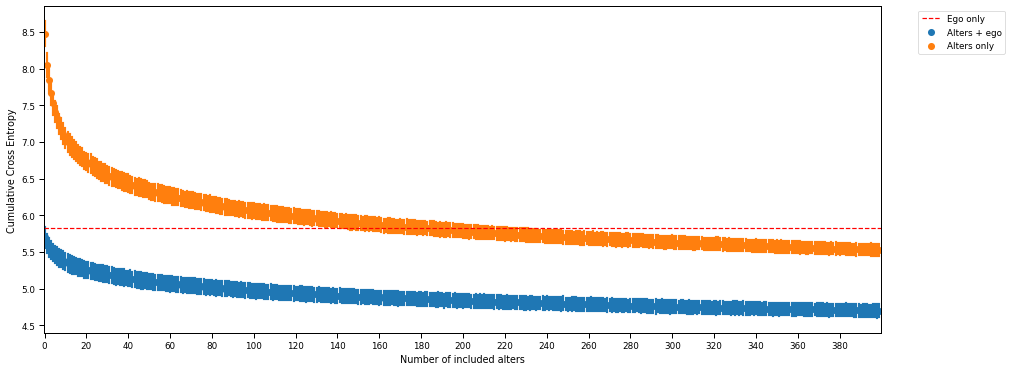

In [77]:
vs.num_point_plot(user_stats_L400, name='entropy', mode='paper', partition=False, threshold=400)

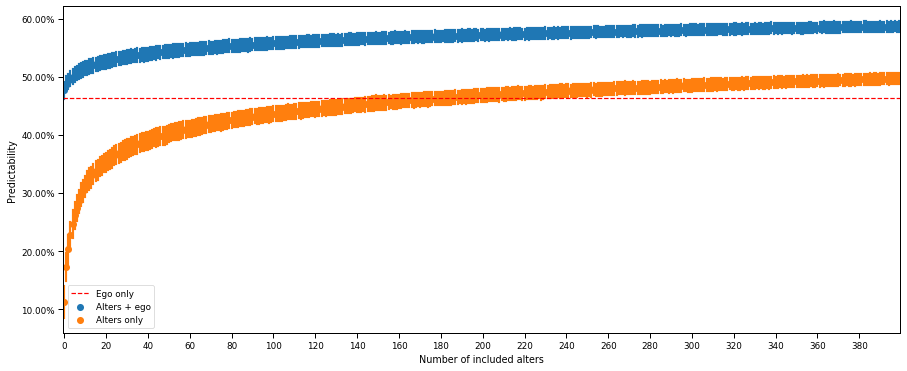

In [78]:
vs.num_point_plot(user_stats_L400, name='predictability', mode='paper', partition=False, threshold=400)

# Focus on ego-alter pairs with 1 meetup

In [43]:
user_stats_one =  user_stats[user_stats['meetup'] == 1]

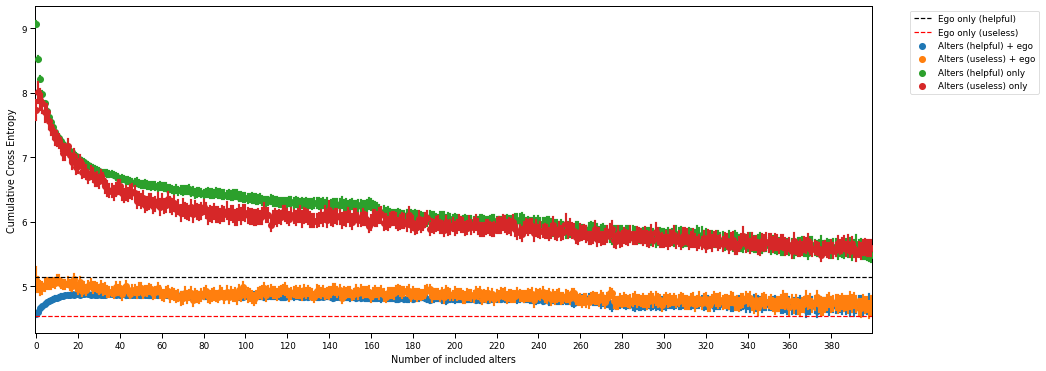

In [44]:
vs.num_point_plot(user_stats_one, name='entropy', mode='paper', threshold=400, partition=True)

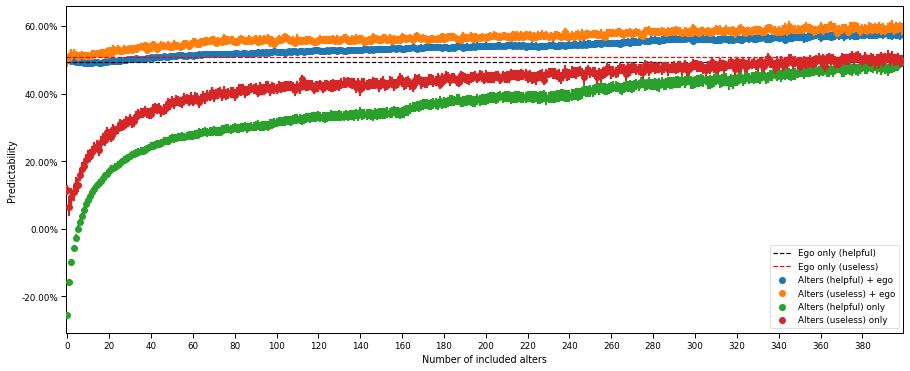

In [45]:
vs.num_point_plot(user_stats_one, name='predictability', mode='paper', threshold=400, partition=True)

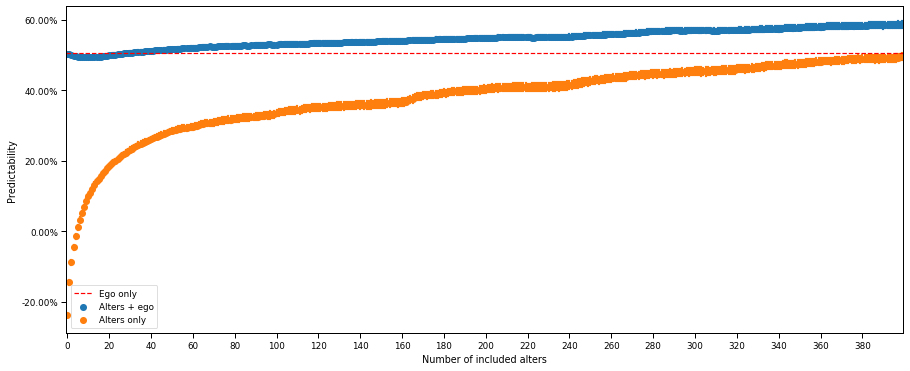

In [50]:
vs.num_point_plot(user_stats_one, name='predictability', mode='paper', threshold=400, partition=False)

# Focus on ego-alter pairs with 2 or more meetup

In [47]:
user_stats_two =  user_stats[user_stats['meetup'] > 1]

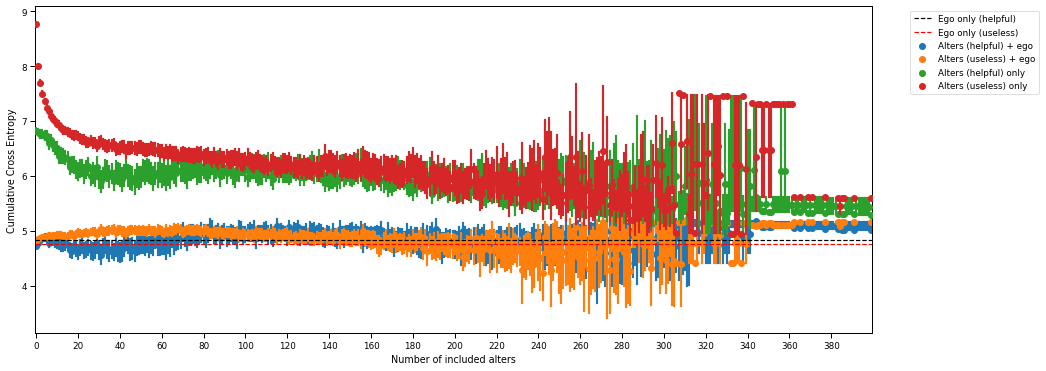

In [48]:
vs.num_point_plot(user_stats_two, name='entropy', mode='paper', threshold=400, partition=True)

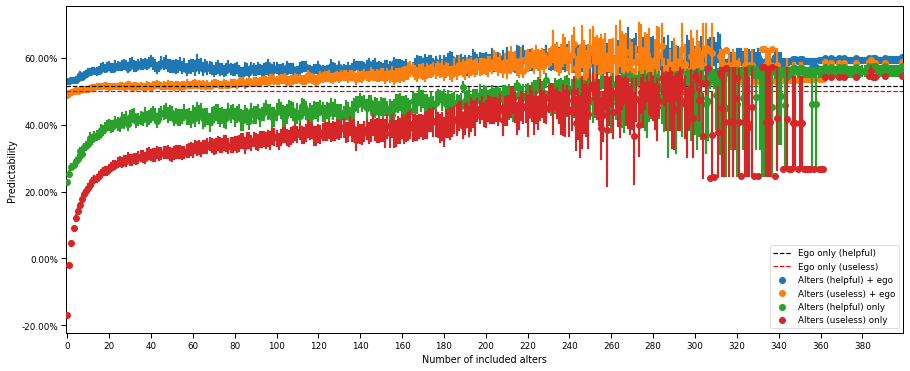

In [49]:
vs.num_point_plot(user_stats_two, name='predictability', mode='paper', threshold=400, partition=True)

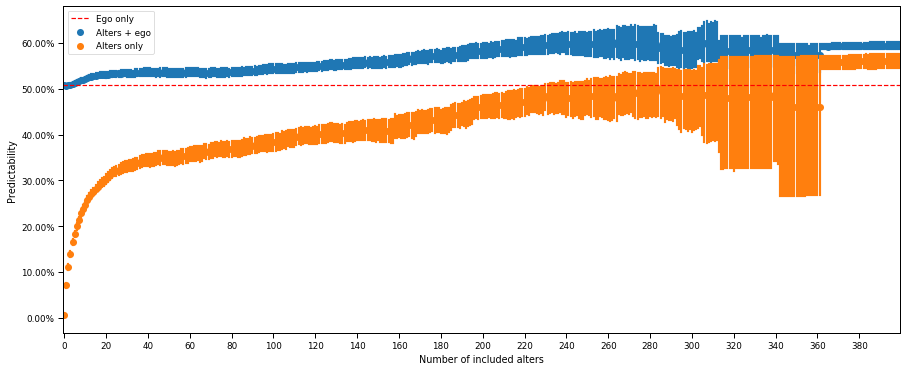

In [51]:
vs.num_point_plot(user_stats_two, name='predictability', mode='paper', threshold=400, partition=False)

# Only use the "helpful" part of dataset

In [2]:
user_stats = pd.read_csv('results/user-meetup-all-None-Good.csv')

## The entire "helpful" meetuper network - entropy vs predictability

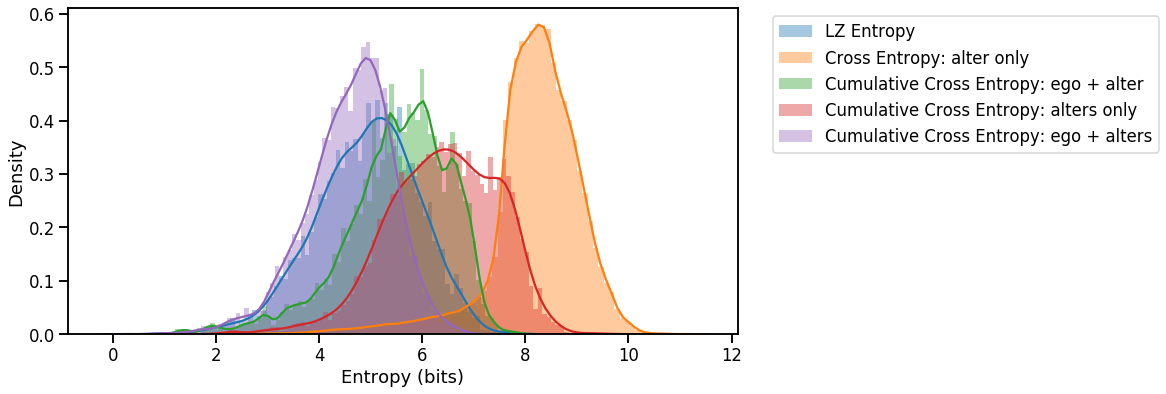

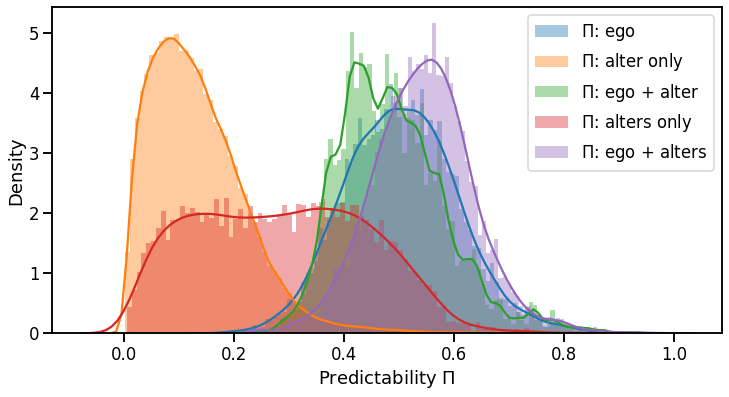

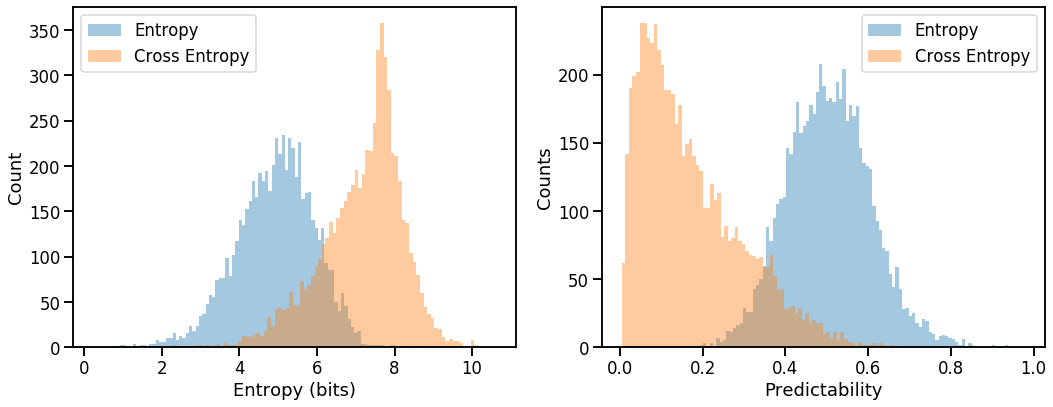

In [6]:
vs.hist_entropy(user_stats)
plt.show()
vs.hist_pred(user_stats)
plt.show()
vs.paper_hist(user_stats)
plt.show()

## The entire "helpful" meetupers network -- Number of alters added vs entropy and predictability

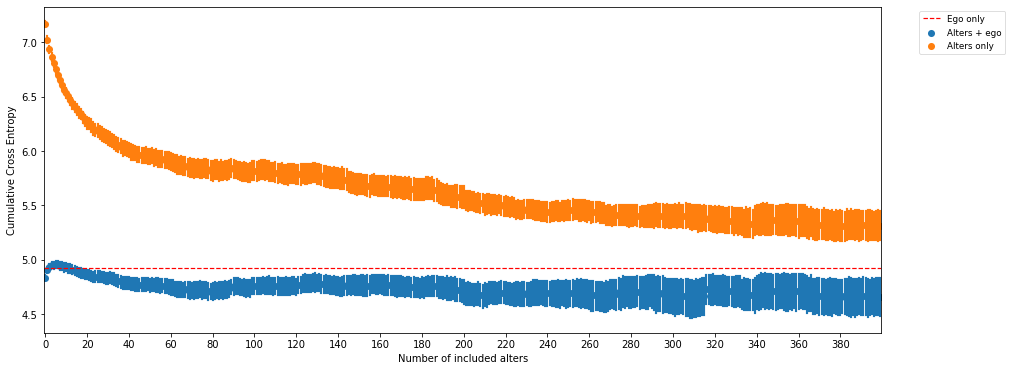

In [ ]:
vs.num_point_plot(user_stats, threshold=400, name='entropy', mode='paper')

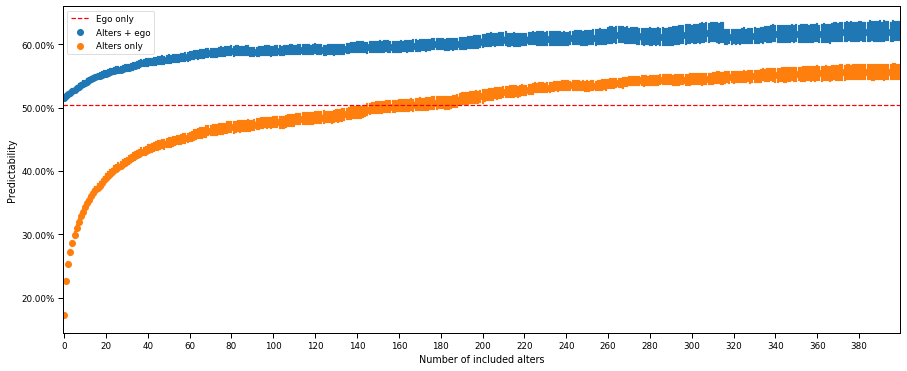

In [4]:
vs.num_point_plot(user_stats, threshold=400, name='predictability', mode='paper')

## Part of "helpful" meetuper network, n_meetupers > 90

In [28]:
user_stats = user_stats.rename(columns={'n_meetupers_y': 'n_meetupers'})

In [52]:
user_stats_part = user_stats[user_stats['n_meetupers'] > 90]
len(set(user_stats_part['userid_x'].tolist()))

344

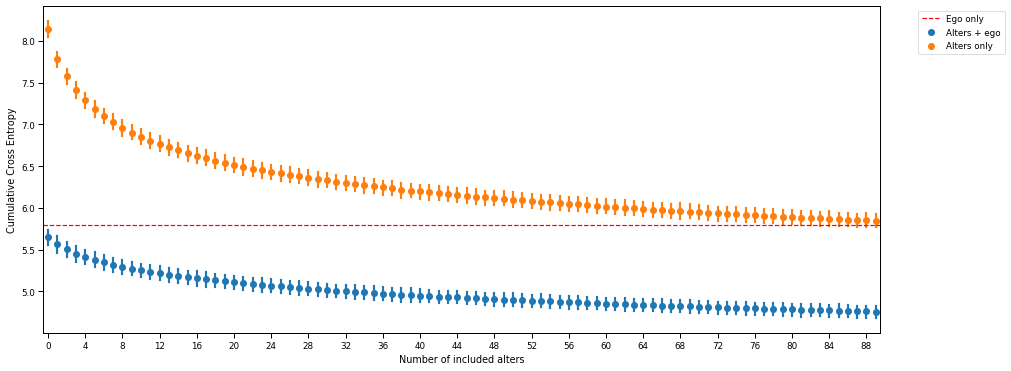

In [53]:
vs.num_point_plot(user_stats_part, name='entropy', mode='paper', threshold=90)

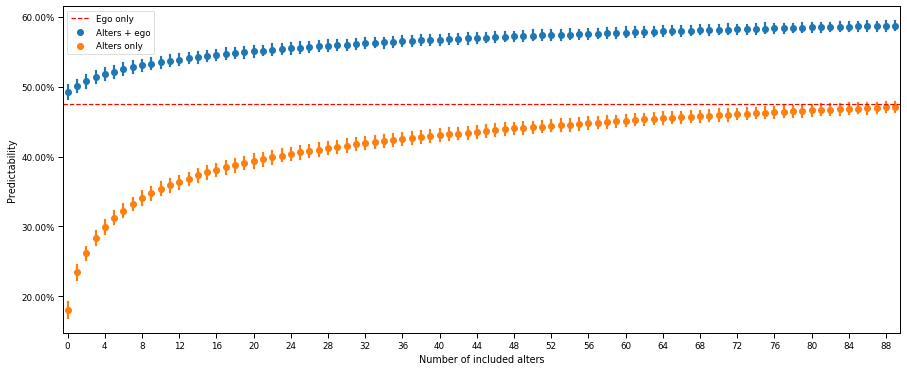

In [54]:
vs.num_point_plot(user_stats_part, name='predictability', mode='paper', threshold=90)